In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten


In [2]:
import pathlib


data_dir = pathlib.Path('dataset')


In [3]:
img_height,img_width=240,240
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 2080 files for training.
Metal device set to: Apple M1 Pro


2022-05-15 02:41:16.213118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 02:41:16.213257: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 519 files for validation.


In [5]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose']


In [8]:
#define model - get from keras/application

In [19]:
model = Sequential()



pretrained_model= tf.keras.applications.EfficientNetB1(
                    include_top=True,
                    weights=None,
                    
                    
)

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

#Now, that we have imported a pre-trained model, we will also add a fully connected and output layer where actual learning can take place.

In [20]:
model.add(Flatten()) #flatten to 1D
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))#output layer

In [21]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1000)             7856239   
                                                                 
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 8,370,290
Trainable params: 514,051
Non-trainable params: 7,856,239
_________________________________________________________________


#The key point to note over here is that the total number of parameters in the Resnet50 model is 24 million. But the trainable parameters are only 1 million.

In [22]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(train_ds, validation_data=val_ds, epochs=20)



Epoch 1/20


2022-05-15 02:50:22.815612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.4034

2022-05-15 02:50:34.626992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 19s 219ms/step - loss: 1.0909 - accuracy: 0.4034 - val_loss: 1.0866 - val_accuracy: 0.4104
Epoch 2/20
65/65 [==============================] - 12s 189ms/step - loss: 1.0889 - accuracy: 0.4034 - val_loss: 1.0861 - val_accuracy: 0.4104
Epoch 3/20
65/65 [==============================] - 13s 197ms/step - loss: 1.0889 - accuracy: 0.4034 - val_loss: 1.0864 - val_accuracy: 0.4104
Epoch 4/20
65/65 [==============================] - 13s 199ms/step - loss: 1.0892 - accuracy: 0.4034 - val_loss: 1.0871 - val_accuracy: 0.4104
Epoch 5/20
65/65 [==============================] - 12s 190ms/step - loss: 1.0886 - accuracy: 0.4034 - val_loss: 1.0861 - val_accuracy: 0.4104
Epoch 6/20
65/65 [==============================] - 12s 185ms/step - loss: 1.0886 - accuracy: 0.4034 - val_loss: 1.0859 - val_accuracy: 0.4104
Epoch 7/20
65/65 [==============================] - 13s 192ms/step - loss: 1.0884 - accuracy: 0.4034 - val_loss: 1.0860 - val_accuracy: 0.4104
Epoch 8/20

KeyboardInterrupt: 

Graph for 20 epochs

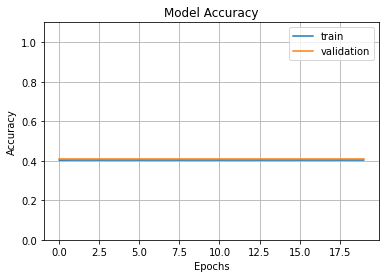

In [18]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()